<div class="alert alert-block alert-info"><font size="5"><center><b><u>FINAL PROJECT: Barcelona Activa IT Academy 2021</u></b></center></font>

\begin{align*}Oriol\:Gallemí\:Rovira\end{align*}
\begin{align*}Advanced\hspace{2mm}Data\hspace{2mm}Science\hspace{2mm}And\hspace{2mm}Machine\hspace{2mm}Learning\hspace{2mm}Systems\end{align*}
$%$
\begin{align*}Advanced\hspace{2mm}Modeling\hspace{2mm}For\hspace{2mm}Combustion\hspace{2mm}Engines\hspace{2mm}In\hspace{2mm}Automobiles.\hspace{2mm}DataSource:\hspace{2mm}Car2DB.com\end{align*}
$%$ 
\begin{align*}Date : December\hspace{2mm}2021\end{align*}</div>

Presentació del conjunt de dades escollit: explicació i observacions generals del conjunt de dades a utilitzar per a fer el projecte final.
Característiques generals: sense necessitat d'entrar molt en detall, explicar les principals característiques que defineixen aquest conjunt de dades. Tipologia, sector, tipus de dades, font, context, etc.
Definició de les variables: explicació teòrica de les principals variables que conté el conjunt de dades.
Presentació dels objectius: detallar els objectius inicials marcats de cara a extreure informació rellevant del conjunt de dades.

- Introducció i explicació del conjunt de dades

- Pre-processat i data cleansing

- Anàlisi numèric i estadístic

- Anàlisi i representacions gràfiques

- Aplicació d'algoritmes i tècniques d'extracció d'informació

- Presentació de la informació extreta i conclusions

In [9]:
# Importacio llibreries globals

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
import xgboost as xgb
import pydotplus
import graphviz
import time
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4

#%matplotlib notebook per poder fer resize als plots interactius
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from sklearn.preprocessing import PolynomialFeatures
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from kneed import KneeLocator
from sklearn.cluster import KMeans
#from sklearn.datasets import make_classification
#from sklearn.datasets import make_blobs
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score, adjusted_rand_score

st = time.time()

In [10]:
# definicio parametres globals

#pd.set_option('display.mpl_style','default') #fer gràfics grans
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 50)
#plt.rcParams.update({'font.size':20,'figure.figsize':(10:8)}) #set plot params. Categoriques: barchar i boxplot. numeriques Histo/scatter/linies/boxplot#


In [98]:
# FUNCIO per trobar gaps al format del DF (fora nan's, mida i forma)
def quick_analysis(df):
 #print('Data Types:')
 #print(df.dtypes)
 print('General Information:')
 print(df.info())
 print('Rows and Columns:')
 print(df.shape)
# print('Column Names:')
# print(df.columns)
 print('Null Values:')
 print(df.apply(lambda x: sum(x.isnull()) / len(df)))
 print('Samples')
 print(df.head())
 print(df.tail())

In [12]:
# Lectura del paquet de dades
#motorsdf=pd.read_csv('C:\\Users\\oriol.gallemi\\ITA Projecte\\motorcolumns.csv', index_col=0, sep=';') #sep='\t', encoding='utf-8' #a vegades cal posar index_col=0 si no fos detectat inicialment
backupdf=pd.read_excel('C:\\Users\\oriol.gallemi\\ITA Projecte\\Car2DB_eng FULL 20211214.xlsx', index_col=0, verbose=True) # sheet_name=0, sep=';', engine='python', verbose=True, encoding_errors='ignore'

motorsdf=backupdf.copy() #deep=True
motorsdf.info()


Reading sheet 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 18032 to 266723
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          63390 non-null  object 
 1   Model         63389 non-null  object 
 2   Year_from     63202 non-null  float64
 3   Body          63389 non-null  object 
 4   Trim          63390 non-null  object 
 5   Seats         63180 non-null  float64
 6   Space         63390 non-null  float64
 7   Volume        63390 non-null  float64
 8   Af            63390 non-null  float64
 9   mass          56587 non-null  float64
 10  Wheel_size    13511 non-null  object 
 11  TrunkLitres   42057 non-null  float64
 12  Nm            62815 non-null  float64
 13  rpmNm         62567 non-null  float64
 14  Injection     59486 non-null  object 
 15  Camshaft      0 non-null      float64
 16  Cyl_layout    63361 non-null  object 
 17  Cyl_count     63390 non-null  int64  
 18  Comp_

In [34]:
# Hi ha una variable buida
motorsdf.drop(['Camshaft'], axis=1, inplace=True)

# Depurat NaN, incompletes, incongruents, errònies
per a totes motorsdf.columns # corregir Typos

In [35]:
motorsdf.Body.value_counts() #cal reetiquetar a clusters més grans. redueixo els numero de valors únics, a estudiar.

Sedan                                11793
Coupe                                 4151
Hatchback 5-doors                     2886
wagon                                 2648
Hatchback                             2591
                                     ...  
F-150 SVT Lighting pickup 2-doors        1
Volt                                     1
VT Coupe                                 1
Aileron Coupe 2-doors                    1
Supersports cabriolet 2-doors            1
Name: Body, Length: 1186, dtype: int64

In [36]:
motorsdf.Boost.value_counts()

Turbo                   12052
none                    11547
turbine                  5378
Biturbo                   832
compressor                593
Turbine + compressor      284
Twin-scroll               163
Triple turbo                8
Intercooler                 2
Name: Boost, dtype: int64

In [37]:
# limitar camps i corregir codificacions BOOST
motorsdf['Boost']=motorsdf['Boost'].str.replace("turbine", "Turbo", regex=True)
motorsdf['Boost']=motorsdf['Boost'].str.replace("none", "Natural", regex=True)
motorsdf['Boost']=motorsdf['Boost'].str.replace("Intercooler", "Turbo", regex=True)
motorsdf['Boost']=motorsdf['Boost'].str.replace("Twin-scroll", "Turbo", regex=False)
motorsdf['Boost']=motorsdf['Boost'].str.replace("Turbine + compressor", "Biturbo", regex=False)
motorsdf['Boost']=motorsdf['Boost'].str.replace("Triple turbo", "Triturbo", regex=True)
motorsdf['Boost']=motorsdf['Boost'].str.replace("compressor", "Turbo", regex=False)

# comprova cleaning
motorsdf.Boost.value_counts()

Turbo       18188
Natural     11547
Biturbo      1116
Triturbo        8
Name: Boost, dtype: int64

In [38]:
motorsdf.Injection.value_counts()

Multi-point fuel injection                                                       23333
carburetor                                                                       11394
distributed injection (multipoint)                                                6825
direct injection                                                                  6464
Common Rail                                                                       5529
Injector                                                                          2441
direct injection (direct)                                                         2163
Monoinjection                                                                      700
Central injection (single-point or single-point)                                   369
Central injection                                                                  204
combined injection (direct-distributed)                                             57
the engine is not separated by the combusti

In [39]:
# limitar camps i corregir codificacions INJECTION
motorsdf['Injection']=motorsdf['Injection'].str.replace("Multi-point fuel injection", "Multipoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("carburetor", "Carburetor", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("distributed injection (multipoint)", "Multipoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("direct injection (direct)", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("direct injection", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Common Rail", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Monoinjection", "Singlepoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Central injection (single-point or single-point)", "Singlepoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Central injection", "Singlepoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Injector", "Singlepoint", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("combined injection (direct-distributed)", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("the engine is not separated by the combustion chamber (direct fuel injection)", "Direct", regex=False)
motorsdf['Injection']=motorsdf['Injection'].str.replace("Diesel", "Direct", regex=False)

# comprova cleaning
motorsdf.Injection.value_counts()

Multipoint     30158
Direct         14220
Carburetor     11394
Singlepoint     3714
Name: Injection, dtype: int64

In [40]:
motorsdf.Cycle.value_counts()

Gasoline                         38766
petrol                           11069
Diesel                            9596
diesel                            3184
Hybrid                             348
hybrid                             192
Gasoline, Gas                      129
Liquefied coal hydrogen gases       60
Gas                                 40
Petrol                               4
Gasoline, Electric                   1
Diesel, Hybrid                       1
Name: Cycle, dtype: int64

In [41]:
# limitar camps i corregir codificacions CYCLE
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("petrol", "Otto", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("diesel", "Diesel", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("hybrid", "Hybrid", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Multi-point fuel injection", "Hybrid", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Multi-point fuel injection", "Hybrid", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Gasoline, Gas", "Otto", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Liquefied coal hydrogen gases", "Otto", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Petrol", "Otto", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Diesel, Hybrid", "Hybrid", regex=False)
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Gasoline, Electric", "Hybrid", regex=False)

In [42]:
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Gasoline", "Otto", regex=False)

In [43]:
motorsdf['Cycle']=motorsdf['Cycle'].str.replace("Gas", "Otto", regex=False)

# comprova cleaning
motorsdf.Cycle.value_counts()

Otto      50068
Diesel    12780
Hybrid      542
Name: Cycle, dtype: int64

In [44]:
motorsdf.Cyl_layout.value_counts()

Inline                     31686
V-type                     16208
inline                     13980
Opposed                      984
opposed                      423
W-type                        52
V-type with small angle       16
Rotary-piston                 11
rotor                          1
Name: Cyl_layout, dtype: int64

In [45]:
# limitar camps i corregir codificacions CYL_LAYOUT
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("inline", "Inline", regex=False)
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("V-type with small angle", "V-type", regex=False)
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("opposed", "Opposed", regex=False)
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("Rotary-piston", "Rotary", regex=False)
motorsdf['Cyl_layout']=motorsdf['Cyl_layout'].str.replace("rotor", "Rotary", regex=False)

# comprova cleaning
motorsdf.Cyl_layout.value_counts()

Inline     45666
V-type     16224
Opposed     1407
W-type        52
Rotary        12
Name: Cyl_layout, dtype: int64

In [46]:
motorsdf.Drive.value_counts()

Front wheel drive           29444
Rear wheel drive            20071
All wheel drive (AWD)        7001
full                         4694
Four wheel drive (4WD)       2158
Constant all wheel drive       21
3500                            1
Name: Drive, dtype: int64

In [47]:
# limitar camps i corregir codificacions DRIVE
motorsdf['Drive']=motorsdf['Drive'].str.replace("Front wheel drive", "FWD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("Rear wheel drive", "RWD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("All wheel drive (AWD)", "4WD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("full", "4WD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("Four wheel drive (4WD)", "4WD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("Constant all wheel drive", "4WD", regex=False)
motorsdf['Drive']=motorsdf['Drive'].str.replace("3500", "", regex=False)

# comprova cleaning
motorsdf.Drive.value_counts()

FWD    29444
RWD    20071
4WD    13874
Name: Drive, dtype: int64

In [48]:
motorsdf.Gear_type.value_counts()

Manual                                      33230
Automatic                                   25664
robot                                        2517
Continuously variable transmission (CVT)     1870
Electronic with 2 clutch                       86
Electronic with 1 clutch                       22
Direct-shift                                    1
Name: Gear_type, dtype: int64

In [49]:
# limitar camps i corregir codificacions GEAR_TYPE
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("robot", "Automatic", regex=False)
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("Continuously variable transmission (CVT)", "CVT", regex=False)
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("Electronic with 2 clutch", "Automatic", regex=False)
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("Electronic with 1 clutch", "Automatic", regex=False)
motorsdf['Gear_type']=motorsdf['Gear_type'].str.replace("Direct-shift", "Automatic", regex=False)

# comprova cleaning
motorsdf.Gear_type.value_counts()

Manual       33230
Automatic    28290
CVT           1870
Name: Gear_type, dtype: int64

In [50]:
motorsdf.Fuel.value_counts()

Super          46147
diesel         12728
80              1036
Gasoline         856
Ethanol          247
Gas              209
diesel fuel       37
Name: Fuel, dtype: int64

In [51]:
# limitar camps i corregir codificacions FUEL ### carburants GAS i ETANOL, can canviar densitats g/km
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("Super", "Petrol", regex=False)
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("80", "LowGrade", regex=False)
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("Gasoline", "Petrol", regex=False)
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("diesel fuel", "Diesel", regex=False)

In [52]:
motorsdf['Fuel']=motorsdf['Fuel'].str.replace("diesel", "Diesel", regex=False)

# comprova cleaning
motorsdf.Fuel.value_counts()

Petrol     47003
Diesel     12765
Ethanol      247
Gas          209
Name: Fuel, dtype: int64

In [99]:
quick_analysis(motorsdf)

General Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 18032 to 266723
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          63390 non-null  object 
 1   Model         63389 non-null  object 
 2   Year_from     63202 non-null  float64
 3   Body          63389 non-null  object 
 4   Trim          63390 non-null  object 
 5   Seats         63180 non-null  float64
 6   Space         63390 non-null  float64
 7   Volume        63390 non-null  float64
 8   Af            63390 non-null  float64
 9   mass          56587 non-null  float64
 10  Wheel_size    13511 non-null  object 
 11  TrunkLitres   42057 non-null  float64
 12  Nm            62815 non-null  float64
 13  rpmNm         62567 non-null  float64
 14  Injection     59486 non-null  object 
 15  Cyl_layout    63361 non-null  object 
 16  Cyl_count     63390 non-null  int64  
 17  Comp_ratio    17256 non-null  float64
 18  

In [54]:
# Exploratòria de primer nivell per veure si hi ha correlacions fortes a primera vista

motorsdf.corr()

,Year_from,Seats,Space,Volume,Af,mass,TrunkLitres,Nm,rpmNm,Cyl_count,Comp_ratio,PistonSpeed,BMEP,Cyl_valves,Bore,Stroke,FlagMismatch,kW,rpmkW,Displacement,Gear_count,Fuel_tank,Acceleration,Speed,Cons,ekWh,ekm,eWh/km
Year_from,1.000000,0.014779,-0.048412,0.095163,0.221169,0.146683,0.134976,0.096346,-0.060511,-0.305626,0.233033,0.211227,0.617675,0.638309,-0.336008,0.166467,-0.027974,0.126733,0.123571,-0.306813,0.720680,-0.101695,-0.351896,0.409137,-0.474820,0.220458,0.313082,-0.082770
Seats,0.014779,1.000000,0.159889,0.260116,0.289772,0.188117,0.354740,-0.049851,-0.100546,-0.060760,0.122761,-0.067460,-0.013824,0.011872,0.040975,0.095523,0.016904,-0.118694,-0.117306,-0.019695,-0.051993,0.091280,0.189926,-0.236697,0.051667,-0.038877,0.001125,0.382596
Space,-0.048412,0.159889,1.000000,0.876130,0.665281,0.862505,0.289048,0.716501,-0.222097,0.667485,0.099614,-0.028179,0.031438,-0.122524,0.734066,0.516440,-0.033350,0.593153,-0.284455,0.781074,0.029302,0.832742,-0.360707,0.402571,0.572543,0.272543,-0.124293,0.608160
Volume,0.095163,0.260116,0.876130,1.000000,0.928734,0.907517,0.496389,0.583423,-0.236691,0.483722,0.210347,-0.069827,0.038120,-0.077953,0.593325,0.518801,-0.025211,0.425545,-0.314658,0.634937,0.077782,0.812302,-0.137502,0.115465,0.426054,0.208783,-0.114958,0.658308
Af,0.221169,0.289772,0.665281,0.928734,1.000000,0.815173,0.600385,0.437807,-0.241515,0.294363,0.260153,-0.077462,0.096200,0.003761,0.414684,0.461296,-0.014140,0.284445,-0.291862,0.439632,0.141494,0.663875,0.002103,-0.053619,0.237805,0.147916,-0.070205,0.584536
mass,0.146683,0.188117,0.862505,0.907517,0.815173,1.000000,0.422087,0.745978,-0.261845,0.594486,0.231339,-0.049531,0.144395,-0.010495,0.666600,0.575511,-0.043720,0.593453,-0.321569,0.723815,0.189402,0.850958,-0.347374,0.370599,0.505151,0.559548,0.135682,0.636449
TrunkLitres,0.134976,0.354740,0.289048,0.496389,0.600385,0.422087,1.000000,0.156818,-0.185179,0.063241,0.153683,-0.150158,0.083690,-0.021556,0.137860,0.202892,-0.000946,0.046074,-0.238752,0.139630,0.066079,0.297607,0.113134,-0.136667,0.001319,0.165402,-0.033734,0.403795
Nm,0.096346,-0.049851,0.716501,0.583423,0.437807,0.745978,0.156818,1.000000,-0.266958,0.737152,0.109582,-0.000623,0.373396,0.020317,0.634976,0.482152,-0.045493,0.882554,-0.236102,0.776612,0.274735,0.647442,-0.634942,0.680207,0.492647,0.280778,-0.143956,0.267085
rpmNm,-0.060511,-0.100546,-0.222097,-0.236691,-0.241515,-0.261845,-0.185179,-0.266958,1.000000,0.001258,-0.427033,0.544485,-0.420340,0.154147,-0.092634,-0.284007,0.009201,0.046437,0.668563,-0.081789,-0.185978,-0.131752,-0.069397,0.036864,0.123364,-0.243928,0.125103,0.153471
Cyl_count,-0.305626,-0.060760,0.667485,0.483722,0.294363,0.594486,0.063241,0.737152,0.001258,1.000000,-0.117741,0.003799,-0.208712,-0.275369,0.670207,0.185779,-0.015231,0.733842,-0.088466,0.897958,-0.146612,0.656321,-0.398578,0.438904,0.758931,0.079664,-0.422584,0.503036


<AxesSubplot:>

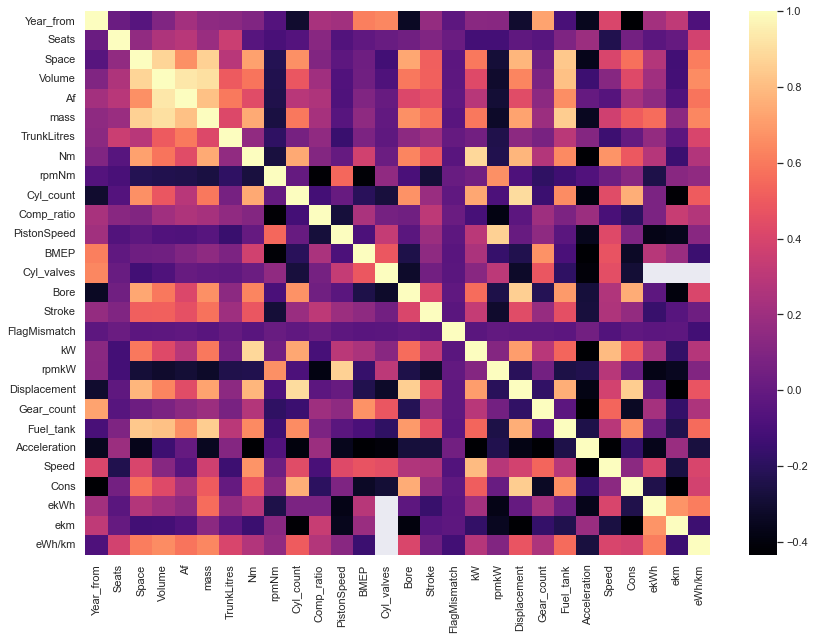

In [63]:
# millor vist en forma de Heatmap

sns.color_palette("magma", as_cmap=True)
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(motorsdf.corr(), cmap='magma', robust=True, xticklabels=True, yticklabels=True)


<AxesSubplot:xlabel='mass', ylabel='Cons'>

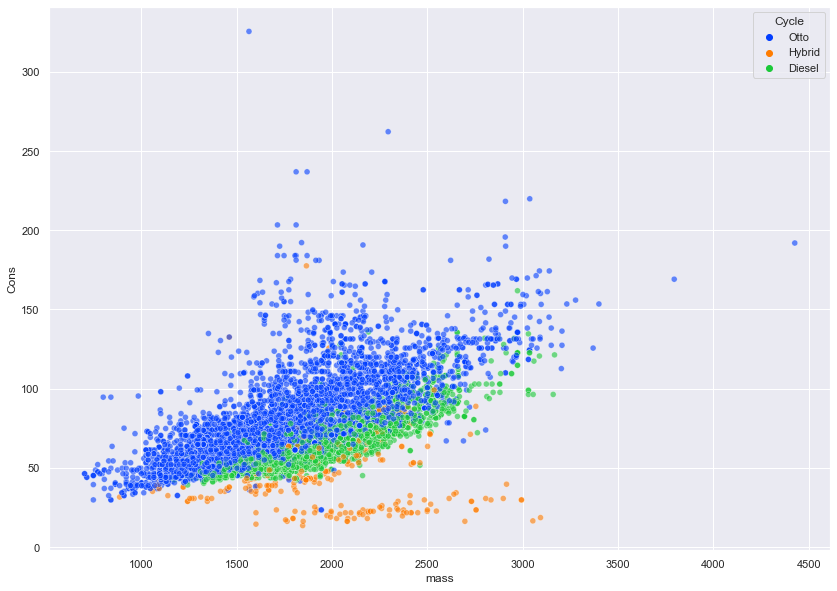

In [91]:
# plot dels models més contemporanis
sns.scatterplot(x='mass', y='Cons', hue='Cycle', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2010)&(motorsdf.Year_from < 2021)], alpha=0.6) 
#'Spectral','viridis','rocket', 'Paired','hls'

<AxesSubplot:xlabel='mass', ylabel='Cons'>

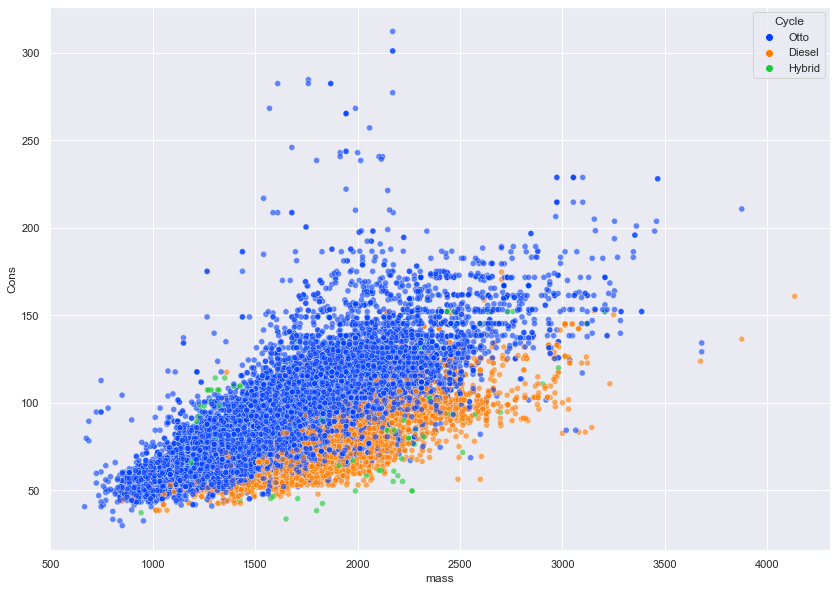

In [92]:
# plot dels models predecessors a la norma EURO V
sns.scatterplot(x='mass', y='Cons', hue='Cycle', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 1995)&(motorsdf.Year_from < 2011)], alpha=0.6)

### Es pot apreciar que s'ha generat una nova expècie de vehicles hibrids que presenten consums massics extremadament baixos en les proves d'homologacio, exhibint una clara discontinuitat

<AxesSubplot:xlabel='PistonSpeed', ylabel='BMEP'>

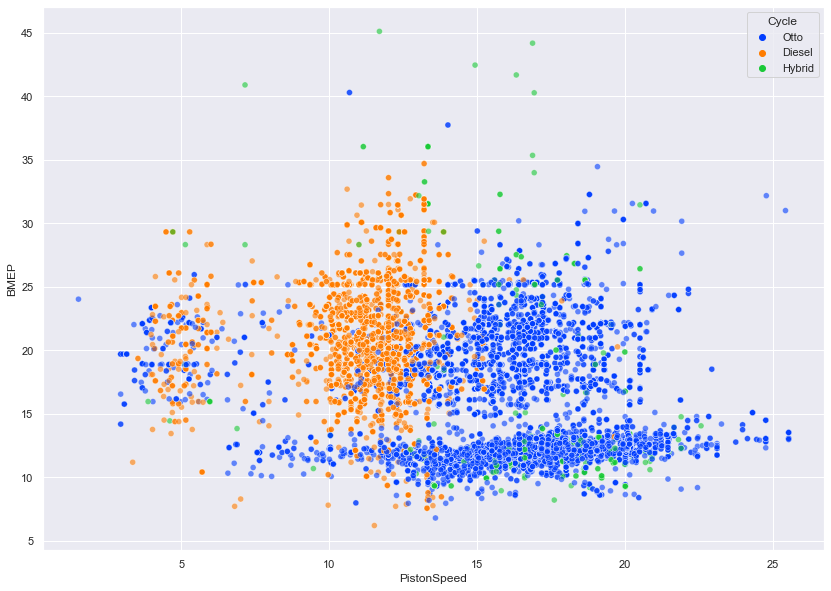

In [93]:
# plot dels models predecessors a la norma EURO V
sns.scatterplot(x='PistonSpeed', y='BMEP', hue='Cycle', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2005)&(motorsdf.Year_from < 2022)], alpha=0.6)

<AxesSubplot:xlabel='PistonSpeed', ylabel='BMEP'>

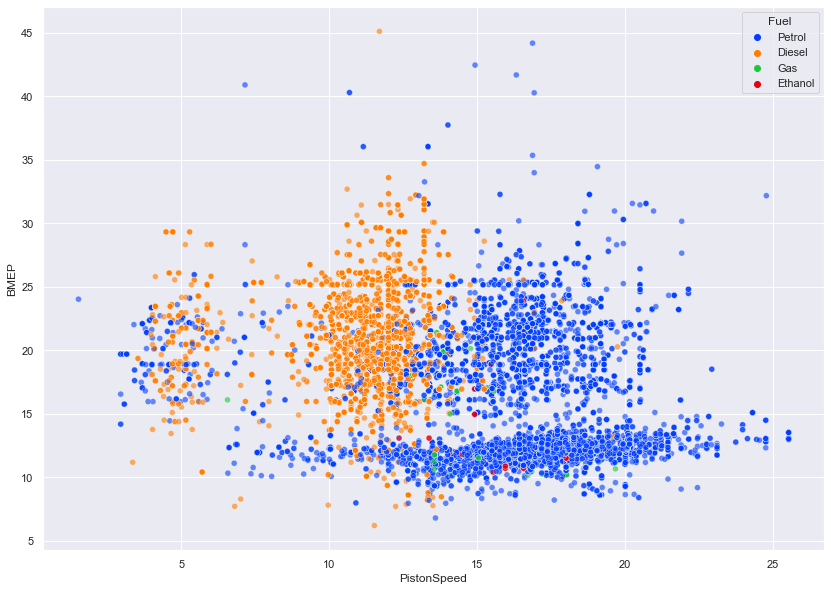

In [94]:
sns.scatterplot(x='PistonSpeed', y='BMEP', hue='Fuel', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2005)&(motorsdf.Year_from < 2022)], alpha=0.6)

<AxesSubplot:xlabel='PistonSpeed', ylabel='BMEP'>

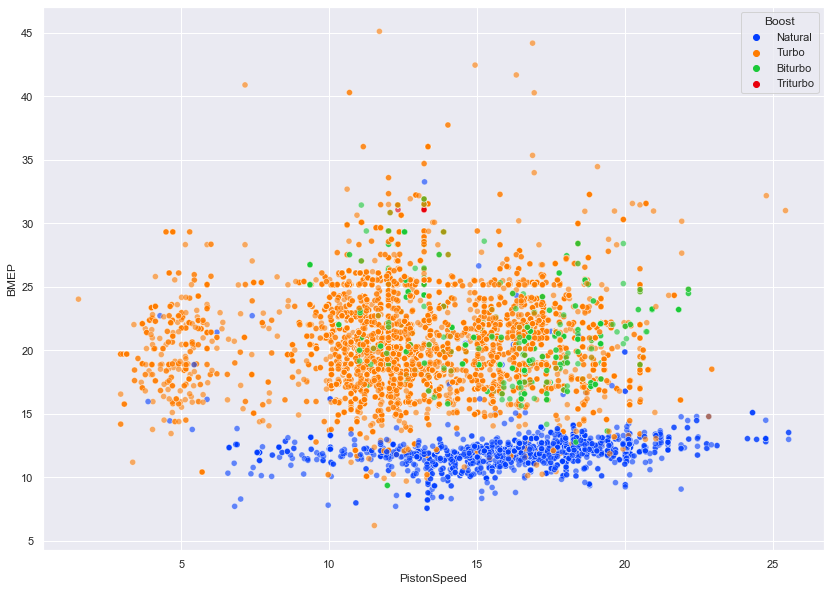

In [95]:
sns.scatterplot(x='PistonSpeed', y='BMEP', hue='Boost', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2005)&(motorsdf.Year_from < 2022)], alpha=0.6)

<AxesSubplot:xlabel='PistonSpeed', ylabel='BMEP'>

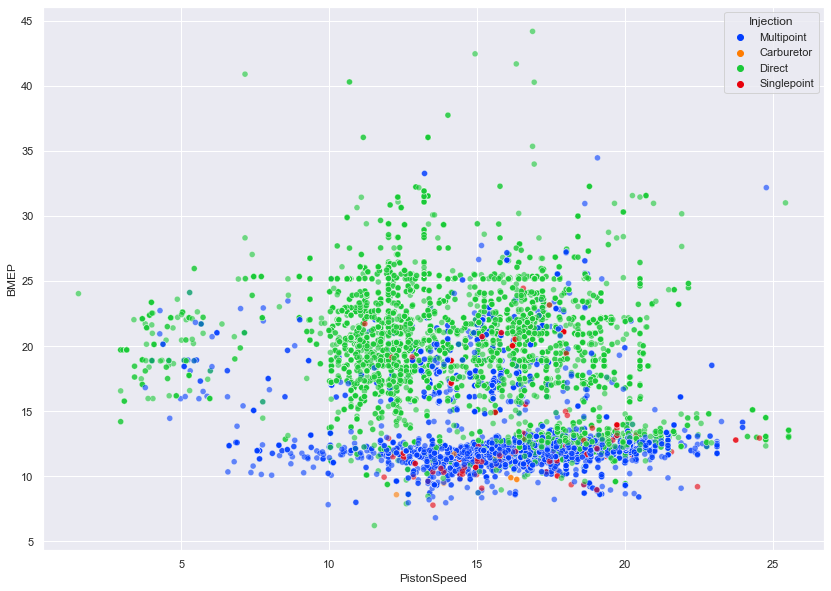

In [96]:
sns.scatterplot(x='PistonSpeed', y='BMEP', hue='Injection', palette='bright',
                data=motorsdf[(motorsdf.Year_from > 2005)&(motorsdf.Year_from < 2022)], alpha=0.6)

#### Aparentment, Fuel i Boost aporten gran informació de cara a la classificació.



# Normalitzacio i estandardització de les dades

In [153]:
motorsdf.columns

Index(['Make', 'Model', 'Year_from', 'Body', 'Trim', 'Seats', 'Space', 'Volume', 'Af', 'mass', 'Wheel_size', 'TrunkLitres', 'Nm', 'rpmNm', 'Injection', 'Cyl_layout', 'Cyl_count', 'Comp_ratio', 'Cycle', 'PistonSpeed', 'BMEP', 'Cyl_valves', 'Boost', 'Bore', 'Stroke', 'FlagMismatch', 'kW', 'rpmkW', 'Displacement', 'Drive', 'Gear_count', 'Gear_type', 'Fuel_tank', 'Acceleration', 'Speed', 'Fuel', 'Cons', 'ekWh', 'ekm', 'eWh/km'], dtype='object')

In [154]:
sub_motorsdf=motorsdf[['Year_from', 'Space', 'Volume', 'Af', 'mass', 'Nm', 'rpmNm', 'Injection', 'Cyl_layout',
                       'Cyl_count', 'Cycle', 'PistonSpeed', 'BMEP', 'Cyl_valves', 'Boost', 'Bore',
                       'Stroke', 'FlagMismatch', 'kW', 'rpmkW', 'Displacement', 'Drive', 'Gear_count', 'Fuel_tank',
                       'Acceleration', 'Speed', 'Fuel', 'Cons']]
#sub_motorsdf.head()
quick_analysis(sub_motorsdf)

General Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 18032 to 266723
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year_from     63202 non-null  float64
 1   Space         63390 non-null  float64
 2   Volume        63390 non-null  float64
 3   Af            63390 non-null  float64
 4   mass          56587 non-null  float64
 5   Nm            62815 non-null  float64
 6   rpmNm         62567 non-null  float64
 7   Injection     59486 non-null  object 
 8   Cyl_layout    63361 non-null  object 
 9   Cyl_count     63390 non-null  int64  
 10  Cycle         63390 non-null  object 
 11  PistonSpeed   62761 non-null  float64
 12  BMEP          63021 non-null  float64
 13  Cyl_valves    62918 non-null  float64
 14  Boost         30859 non-null  object 
 15  Bore          63390 non-null  float64
 16  Stroke        63390 non-null  float64
 17  FlagMismatch  63390 non-null  int64  
 18  

In [155]:
# cal eliminar tots els NaN
sub_motorsdf.dropna(axis=0, how='any', inplace=True)
sub_motorsdf.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(15178, 28)

In [156]:
# collocacio de dummies absoluts
#codifico algunes les columnes significatives, deixant marca i model a banda ()
dummy_cols = ['Injection', 'Cyl_layout', 'Cycle', 'Boost', 'Drive', 'Fuel']
sub_motorsdf = pd.get_dummies(sub_motorsdf, columns = dummy_cols)
sub_motorsdf.shape

(15178, 44)

In [157]:
# normalitzavio i estandaritzacio
# PRE: entra de tot en format numèric pandas.df

# Normalize function the DF using min/max scaler. PCA requires [0...1]
def normalize(df):
    scaler = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
    dates_scaled = scaler.fit_transform(df)
    return dates_scaled

# Normalization call 
Nsub_motorsnd = normalize(sub_motorsdf)
#POST: surten float64 normalitzats en un np.Array

In [158]:
Nsub_motorsdf=pd.DataFrame(Nsub_motorsnd, columns=sub_motorsdf.columns)
Nsub_motorsdf.shape

(15178, 44)

In [160]:
#quick_analysis(Nsub_motorsdf)

In [ ]:
pca = PCA(0.95, whiten=True)
data = pca.fit_transform(Nsub_motorsdf)
data.shape

In [ ]:
sns.heatmap(data, cmap='magma', robust=True, xticklabels=True, yticklabels=True)

<AxesSubplot:>

# ARA AMB CLASSIFICADORS MES ESTANDARDS **************************************************

In [ ]:
# Classificar a quin tipus de motor pertany donades unes especificacions